In [1]:
# CVXPY part is directly inspired by: https://cs.stanford.edu/~tachim/optimization_code.html

import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

## Using CVXPY:

Define some points:

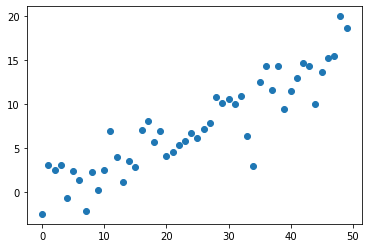

In [2]:
X = np.arange(50) # [0...49]
Y = 0.3 * X + np.random.normal(0, 2.5, 50) # X + gaussian distribuiton with 0 mean and 2.5 std
plt.scatter(X, Y)

Minimize the loss with respect to w and b. The huber loss will be used to get a big loss value for wrong points

In [3]:
w = cp.Variable()
loss = sum(cp.huber(w * X[i] - Y[i], 1) for i in range(len(X)))
cp.Problem(cp.Minimize(loss), []).solve()
w = w.value

The best w:

In [4]:
w

array(0.31988821)

Fitted line:

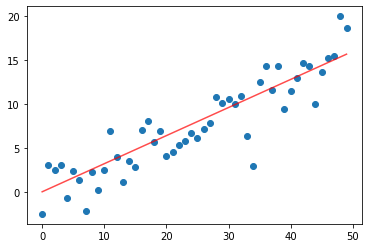

In [5]:
plt.scatter(X, Y)
plt.plot(X, w * X, color='red', alpha=0.7)

## From scratch:

In [6]:
def H(w, x):
    
    '''
    given a value to w, and a array to x, this function will return the dot product of the vector w and the matrix x, meaning the prediction for that w
    
    W = theta
    X = feature input, array or number
    H = len(X) dim array
    '''
    
    return [np.dot(w, value) for value in x]

In [7]:
H([0.3], X)[:5]

[array([0.]), array([0.3]), array([0.6]), array([0.9]), array([1.2])]

Gradient descent to solve the optimization problem:

In [8]:
def gradient(w, h, x, y):
    
    '''
    given a theta and a hypothesis function, this fuction will return the partial derivative (gradient) of the squared error cost function for (x, y)
    
    w        = array
    h        = function
    x        = array or number
    y        = array or number
    gradient = np array
    '''
    
    return sum((np.dot((h(w, x)[i] - y[i]), x[i]) for i in range(len(x))))

In [9]:
gradient([0.3], H, X, Y)

array([-539.9422861])

In [10]:
def GD(eta, iterations, grad, x, y, d):
    
    '''
    given a learning rate(eta), a numeber of iterations, a gradient, feature input x and expected output y, get the optimal theta for the hypothesis function
    
    eta        = float
    iterations = int
    grad       = function
    X          = feature input, array or number
    d          = number of columns of X
    GD         = w array
    '''
    
    w = np.zeros(d)
    for i in range(1, iterations + 1):
        gradient = grad(w, H, x, y)
        w = w - np.dot(eta, gradient)
        if i % 10 == 0:
            print('iteration {}, w:{}'.format(i, w))
    print('Optimal w: {}'.format(w))
    return w

In [11]:
w = GD(0.00001, 50, gradient, X, Y, 1)

iteration 10, w:[0.31159191]
iteration 20, w:[0.3133467]
iteration 30, w:[0.31335659]
iteration 40, w:[0.31335664]
iteration 50, w:[0.31335664]
Optimal w: [0.31335664]


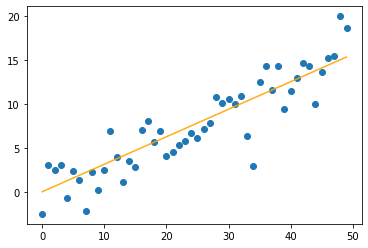

In [12]:
plt.scatter(X, Y)
plt.plot(X, w * X, color='orange', alpha=0.9)

## Using SKLearn:

In [13]:
from sklearn import linear_model

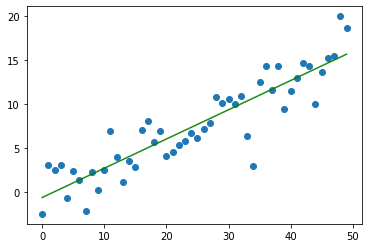

In [14]:
regression = linear_model.LinearRegression()
regression.fit(X.reshape(-1, 1), Y)
plt.scatter(X, Y)
plt.plot(X, regression.predict(X.reshape(-1, 1)),color='green', alpha=0.9)